In [1]:
from influxdb import InfluxDBClient
from influxdb import DataFrameClient
import numpy as np
import pandas as pd

client = DataFrameClient(host='localhost', port=8086, username='admin', password='admin' , database='VirtualBuilding_ottimizzato')

#T = client.query('SELECT value FROM "T_ext"')
#T_in_query = client.query('SELECT mean("value") FROM "test" WHERE ("node" = \'Tin_Kitchen\' OR "node" = \'Tin_Bathroom\' OR "node" = \'Tin_Bedroom\' OR "node" = \'Tin_LivingRoom\' OR "node" = \'Tin_Storage\' OR "node" = \'Tin_Stairs\') AND time >= 1483243655000ms and time <= 1514720659000ms GROUP BY time(30m)')
Tin_Bathroom_query = client.query('SELECT value FROM "Tin_Bathroom"')
Tin_Kitchen_query = client.query('SELECT value FROM "Tin_Kitchen"')
Tin_Bedroom_query = client.query('SELECT value FROM "Tin_Bedroom"')
Tin_Livingroom_query = client.query('SELECT value FROM "Tin_LivingRoom"')
Tin_Stairs_query = client.query('SELECT value FROM "Tin_Stairs"')
Tin_Storage_query = client.query('SELECT value FROM "Tin_Storage"')
T_ext_query = client.query('SELECT "value" FROM "T_ext"')
DHeating_query = client.query('SELECT "value" FROM "DistrictHeating"')
DCooling_query = client.query('SELECT "value" FROM "DistrictCooling"')
DHI_query = client.query('SELECT "value" FROM "DHI"')
DNI_query = client.query('SELECT "value" FROM "DNI"')
cos_teta_query = client.query('SELECT "value" FROM "cos_teta"')

In [2]:
T_in_df = Tin_Bathroom_query['Tin_Bathroom']
T_in_df['Tin_Bath'] = T_in_df['value']
T_in_df = T_in_df.drop('value', axis=1)
T_in_df['Tin_K'] = Tin_Kitchen_query['Tin_Kitchen']
T_in_df['Tin_Bed'] = Tin_Bedroom_query['Tin_Bedroom']
T_in_df['Tin_Liv'] = Tin_Livingroom_query['Tin_LivingRoom']
T_in_df['Tin_Stairs'] = Tin_Stairs_query['Tin_Stairs']
T_in_df['Tin_Storage'] = Tin_Storage_query['Tin_Storage']
T_in_df = T_in_df.dropna()
T_in_df['mean_house'] = T_in_df.mean(axis=1)
#T_in_df = T_in_df['mean_house']
T_in_df

,Tin_Bath,Tin_K,Tin_Bed,Tin_Liv,Tin_Stairs,Tin_Storage,mean_house
2017-01-01 00:30:00+00:00,15.832862,16.386438,18.190779,18.412540,16.358489,17.067984,17.041515
2017-01-01 01:00:00+00:00,15.819463,16.384983,18.212283,18.439550,16.949633,17.364307,17.195037
2017-01-01 01:30:00+00:00,15.764893,16.345288,18.152943,18.393450,16.962929,17.319897,17.156567
2017-01-01 02:00:00+00:00,15.708564,16.302918,18.054602,18.307098,16.780074,17.219037,17.062049
2017-01-01 02:30:00+00:00,15.658587,16.255488,17.993700,18.253478,16.743313,17.193345,17.016318
...,...,...,...,...,...,...,...
2017-12-31 22:00:00+00:00,18.000000,18.038239,19.000000,19.068607,18.000000,18.000000,18.351141
2017-12-31 22:30:00+00:00,16.660115,18.041367,19.000000,19.052410,18.000000,18.000000,18.125649
2017-12-31 23:00:00+00:00,16.402508,18.040356,19.000000,19.032527,18.000000,18.000000,18.079232
2017-12-31 23:30:00+00:00,16.149828,16.748775,18.879688,18.938548,18.000000,18.000000,17.786140


In [3]:
T_ext_df = T_ext_query['T_ext']
T_ext_df

,value
2017-01-01 00:30:00+00:00,2.90
2017-01-01 01:00:00+00:00,3.50
2017-01-01 01:30:00+00:00,3.45
2017-01-01 02:00:00+00:00,3.40
2017-01-01 02:30:00+00:00,3.25
...,...
2017-12-31 22:00:00+00:00,5.00
2017-12-31 22:30:00+00:00,4.80
2017-12-31 23:00:00+00:00,4.60
2017-12-31 23:30:00+00:00,4.45


In [4]:
DHeating_query['DistrictHeating']['value'] = DHeating_query['DistrictHeating']['value']/(1.8 * 10**6)
DHeating_df = DHeating_query['DistrictHeating']
DHeating_df

,value
2017-01-01 00:30:00+00:00,0.000000
2017-01-01 01:00:00+00:00,0.000000
2017-01-01 01:30:00+00:00,0.000000
2017-01-01 02:00:00+00:00,0.000000
2017-01-01 02:30:00+00:00,0.000000
...,...
2017-12-31 22:00:00+00:00,0.324376
2017-12-31 22:30:00+00:00,1.604563
2017-12-31 23:00:00+00:00,0.218720
2017-12-31 23:30:00+00:00,0.442508


In [5]:
DCooling_query['DistrictCooling']['value'] = DCooling_query['DistrictCooling']['value']/(3.6 * 10**6)
DCooling_df = DCooling_query['DistrictCooling']
DCooling_df

,value
2017-01-01 00:30:00+00:00,0.0
2017-01-01 01:00:00+00:00,0.0
2017-01-01 01:30:00+00:00,0.0
2017-01-01 02:00:00+00:00,0.0
2017-01-01 02:30:00+00:00,0.0
...,...
2017-12-31 22:00:00+00:00,0.0
2017-12-31 22:30:00+00:00,0.0
2017-12-31 23:00:00+00:00,0.0
2017-12-31 23:30:00+00:00,0.0


In [6]:
cos_teta_df = cos_teta_query['cos_teta']
#colonne = {'value':np.random.rand(17520)}
#cos_teta_df = pd.DataFrame(colonne)
#cos_teta_df = cos_teta_df.rename(columns={'0': 'value'})
cos_teta_df = cos_teta_df.reset_index(drop=True)
cos_teta_df

,value
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17515,0.0
17516,0.0
17517,0.0
17518,0.0


In [7]:
DHI_df = DHI_query['DHI']
DNI_df = DNI_query['DNI']
DHI_df = DHI_df.reset_index(drop=True)
DNI_df = DNI_df.reset_index(drop=True)
DNI_df

,value
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17515,0.0
17516,0.0
17517,0.0
17518,0.0


In [8]:
tmp_df = DHI_df
tmp_df['DNI'] = DNI_df['value']
tmp_df['cos_teta'] = cos_teta_df['value']
tmp_df = tmp_df.rename(columns={'value':'DHI'})
tmp_df

,DHI,DNI,cos_teta
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
17515,0.0,0.0,0.0
17516,0.0,0.0,0.0
17517,0.0,0.0,0.0
17518,0.0,0.0,0.0


In [9]:
GHI = tmp_df['DNI'] * tmp_df['cos_teta'] + tmp_df['DHI']

In [10]:
colonne = {'value':GHI}
GHI_df = pd.DataFrame(colonne)
GHI_df = GHI_df.reset_index(drop=True)
GHI_df

,value
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17515,0.0
17516,0.0
17517,0.0
17518,0.0


In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [12]:
%matplotlib inline

In [13]:
#df = pd.DataFrame()

In [14]:
df = pd.DataFrame(T_in_df['mean_house'])
df

,mean_house
2017-01-01 00:30:00+00:00,17.041515
2017-01-01 01:00:00+00:00,17.195037
2017-01-01 01:30:00+00:00,17.156567
2017-01-01 02:00:00+00:00,17.062049
2017-01-01 02:30:00+00:00,17.016318
...,...
2017-12-31 22:00:00+00:00,18.351141
2017-12-31 22:30:00+00:00,18.125649
2017-12-31 23:00:00+00:00,18.079232
2017-12-31 23:30:00+00:00,17.786140


In [15]:
df['T_ext'] = T_ext_df['value']
df = df.rename(columns={'mean_house':'T_in'})
df['District_Heating [kW]'] = DHeating_df['value']
df['District_Cooling [kW]'] = DCooling_df['value']
df['GHI'] = GHI_df['value']
df.head(n=10)

,T_in,T_ext,District_Heating [kW],District_Cooling [kW],GHI
2017-01-01 00:30:00+00:00,17.041515,2.90,0.000000,0.0,NaN
2017-01-01 01:00:00+00:00,17.195037,3.50,0.000000,0.0,NaN
2017-01-01 01:30:00+00:00,17.156567,3.45,0.000000,0.0,NaN
2017-01-01 02:00:00+00:00,17.062049,3.40,0.000000,0.0,NaN
2017-01-01 02:30:00+00:00,17.016318,3.25,0.000000,0.0,NaN
2017-01-01 03:00:00+00:00,16.980657,3.10,0.000000,0.0,NaN
2017-01-01 03:30:00+00:00,16.942906,3.05,0.000000,0.0,NaN
2017-01-01 04:00:00+00:00,16.906252,3.00,0.000000,0.0,NaN
2017-01-01 04:30:00+00:00,17.235706,2.95,0.000000,0.0,NaN
2017-01-01 05:00:00+00:00,17.265994,2.90,0.531466,0.0,NaN


In [16]:
for i in range(df.shape[0]):
    valore = GHI_df.iloc[i,0]
    df['GHI'][i] = valore

df

,T_in,T_ext,District_Heating [kW],District_Cooling [kW],GHI
2017-01-01 00:30:00+00:00,17.041515,2.90,0.000000,0.0,0.0
2017-01-01 01:00:00+00:00,17.195037,3.50,0.000000,0.0,0.0
2017-01-01 01:30:00+00:00,17.156567,3.45,0.000000,0.0,0.0
2017-01-01 02:00:00+00:00,17.062049,3.40,0.000000,0.0,0.0
2017-01-01 02:30:00+00:00,17.016318,3.25,0.000000,0.0,0.0
...,...,...,...,...,...
2017-12-31 22:00:00+00:00,18.351141,5.00,0.324376,0.0,0.0
2017-12-31 22:30:00+00:00,18.125649,4.80,1.604563,0.0,0.0
2017-12-31 23:00:00+00:00,18.079232,4.60,0.218720,0.0,0.0
2017-12-31 23:30:00+00:00,17.786140,4.45,0.442508,0.0,0.0


In [17]:
df.to_csv('energy_signature_data.csv')

## Start here

In [18]:
#df = pd.read_csv('energy_signature_data.csv')

In [19]:
df.index=pd.to_datetime(df.index,unit='s')

In [20]:
df.columns
df

,T_in,T_ext,District_Heating [kW],District_Cooling [kW],GHI
2017-01-01 00:30:00+00:00,17.041515,2.90,0.000000,0.0,0.0
2017-01-01 01:00:00+00:00,17.195037,3.50,0.000000,0.0,0.0
2017-01-01 01:30:00+00:00,17.156567,3.45,0.000000,0.0,0.0
2017-01-01 02:00:00+00:00,17.062049,3.40,0.000000,0.0,0.0
2017-01-01 02:30:00+00:00,17.016318,3.25,0.000000,0.0,0.0
...,...,...,...,...,...
2017-12-31 22:00:00+00:00,18.351141,5.00,0.324376,0.0,0.0
2017-12-31 22:30:00+00:00,18.125649,4.80,1.604563,0.0,0.0
2017-12-31 23:00:00+00:00,18.079232,4.60,0.218720,0.0,0.0
2017-12-31 23:30:00+00:00,17.786140,4.45,0.442508,0.0,0.0


Text(0, 0.5, 'W')

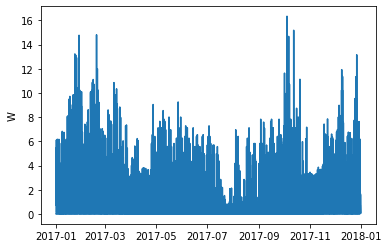

In [21]:
plt.plot(df['District_Heating [kW]'])
plt.ylabel("W")

Text(0, 0.5, 'W')

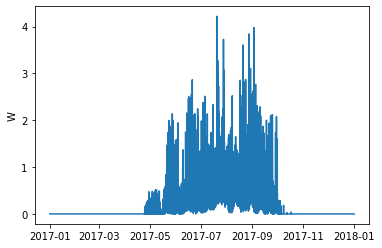

In [22]:
plt.plot(df['District_Cooling [kW]'])
plt.ylabel("W")

In [23]:
df['deltaT']=df.T_in-df.T_ext
df_cool = df[df['District_Cooling [kW]'] > 0.12]
df_heat = df[df['District_Heating [kW]'] > 0.12]

In [24]:
'''
fig, axs = plt.subplots(1,2, constrained_layout=True)
fig.suptitle("Energy signature", fontweight="bold")
axs[0].scatter(df.deltaT,df['District_Heating [W]'])
axs[0].set_title("District Heating")
axs[0].set_xlabel("\u0394T [°C]")
axs[0].set_ylabel("Power [W]")
axs[1].scatter(df_cool.deltaT,df_cool['District_Cooling [W]'])
axs[1].set_title("District Cooling")
axs[1].set_xlabel("\u0394T [°C]")
axs[1].set_ylabel("Power [W]")
'''

'\nfig, axs = plt.subplots(1,2, constrained_layout=True)\nfig.suptitle("Energy signature", fontweight="bold")\naxs[0].scatter(df.deltaT,df[\'District_Heating [W]\'])\naxs[0].set_title("District Heating")\naxs[0].set_xlabel("ΔT [°C]")\naxs[0].set_ylabel("Power [W]")\naxs[1].scatter(df_cool.deltaT,df_cool[\'District_Cooling [W]\'])\naxs[1].set_title("District Cooling")\naxs[1].set_xlabel("ΔT [°C]")\naxs[1].set_ylabel("Power [W]")\n'

Text(0, 0.5, 'Power [kW]')

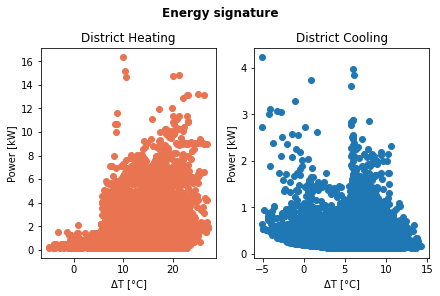

In [25]:
fig, axs = plt.subplots(1,2, constrained_layout=True)
fig.suptitle("Energy signature", fontweight="bold")
axs[0].scatter(df_heat.deltaT,df_heat['District_Heating [kW]'], color='#e97451')
axs[0].set_title("District Heating")
axs[0].set_xlabel("\u0394T [°C]")
axs[0].set_ylabel("Power [kW]")
axs[1].scatter(df_cool.deltaT,df_cool['District_Cooling [kW]'])
axs[1].set_title("District Cooling")
axs[1].set_xlabel("\u0394T [°C]")
axs[1].set_ylabel("Power [kW]")

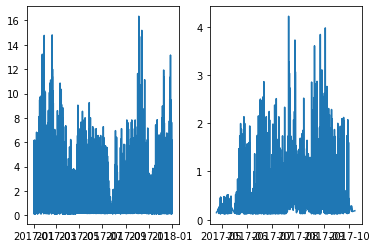

In [26]:
fig, axs = plt.subplots(1,2)
#plt.scatter(df.deltaT,df['District_Heating [W]'])
axs[0].plot(df_heat['District_Heating [kW]'])
axs[1].plot(df_cool['District_Cooling [kW]'])

In [27]:
df=df.resample('H').mean()
df_cool = df[df['District_Cooling [kW]'] > 0.12]
df_heat = df[df['District_Heating [kW]'] > 0.12]

Text(0, 0.5, 'Power [kW]')

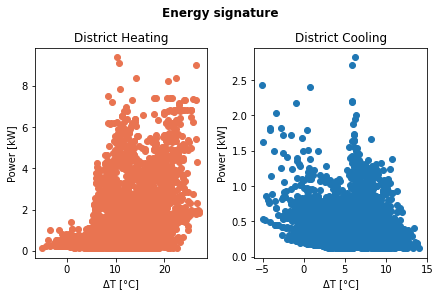

In [28]:
fig, axs = plt.subplots(1,2, constrained_layout=True)
fig.suptitle("Energy signature", fontweight="bold")
axs[0].scatter(df_heat.deltaT,df_heat['District_Heating [kW]'], color='#e97451')
axs[0].set_title("District Heating")
axs[0].set_xlabel("\u0394T [°C]")
axs[0].set_ylabel("Power [kW]")
axs[1].scatter(df_cool.deltaT,df_cool['District_Cooling [kW]'])
axs[1].set_title("District Cooling")
axs[1].set_xlabel("\u0394T [°C]")
axs[1].set_ylabel("Power [kW]")

In [29]:
df=df.resample('D').mean()
df_cool = df[df['District_Cooling [kW]'] > 0.12]
df_heat = df[df['District_Heating [kW]'] > 0.12]


Text(0, 0.5, 'Power [kW]')

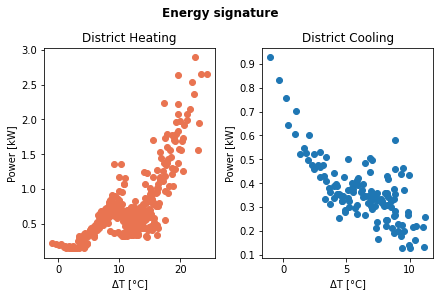

In [30]:
fig, axs = plt.subplots(1,2, constrained_layout=True)
fig.suptitle("Energy signature", fontweight="bold")
#plt.scatter(df.deltaT,df['District_Heating [W]'])
axs[0].scatter(df_heat.deltaT,df_heat['District_Heating [kW]'], color='#e97451')
axs[0].set_title("District Heating")
axs[0].set_xlabel("\u0394T [°C]")
axs[0].set_ylabel("Power [kW]")
axs[1].scatter(df_cool.deltaT,df_cool['District_Cooling [kW]'])
axs[1].set_title("District Cooling")
axs[1].set_xlabel("\u0394T [°C]")
axs[1].set_ylabel("Power [kW]")

In [31]:
df=df.resample('W').mean()
df_cool = df[df['District_Cooling [kW]'] > 0.12]
df_heat = df[df['District_Heating [kW]'] > 0.12]
#df_cool = df_cool.resample('W').mean()
#df_heat = df_heat.resample('W').mean()

Text(0, 0.5, 'Power [kW]')

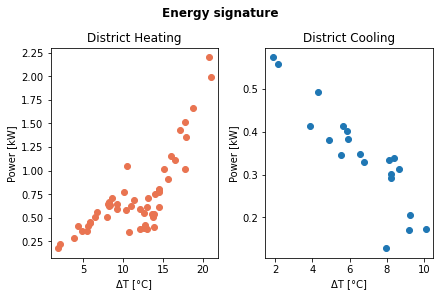

In [32]:
fig, axs = plt.subplots(1,2, constrained_layout=True)
fig.suptitle("Energy signature", fontweight="bold")
axs[0].scatter(df_heat.deltaT,df_heat['District_Heating [kW]'], color='#e97451')
axs[0].set_title("District Heating")
axs[0].set_xlabel("\u0394T [°C]")
axs[0].set_ylabel("Power [kW]")
axs[1].scatter(df_cool.deltaT,df_cool['District_Cooling [kW]'])
axs[1].set_title("District Cooling")
axs[1].set_xlabel("\u0394T [°C]")
axs[1].set_ylabel("Power [kW]")

In [33]:
df=df.dropna()

In [34]:
model_heating = sm.OLS(df_heat['District_Heating [kW]'],sm.add_constant(df_heat.deltaT))
model_cooling = sm.OLS(df_cool['District_Cooling [kW]'],sm.add_constant(df_cool.deltaT))

In [35]:
results_heating=model_heating.fit()
results_cooling=model_cooling.fit()

Text(0, 0.5, 'Power [kW]')

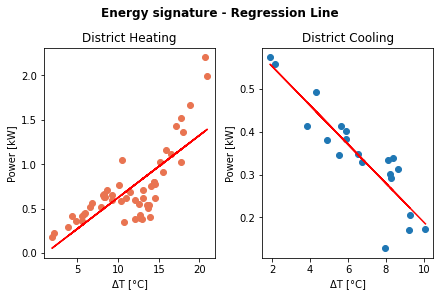

In [36]:
fig, axs = plt.subplots(1,2, constrained_layout=True)
fig.suptitle("Energy signature - Regression Line", fontweight="bold")
axs[0].plot(df_heat.deltaT,results_heating.predict(),'r')
axs[0].scatter(df_heat.deltaT,df_heat['District_Heating [kW]'], color='#e97451')
axs[0].set_title("District Heating")
axs[0].set_xlabel("\u0394T [°C]")
axs[0].set_ylabel("Power [kW]")
axs[1].plot(df_cool.deltaT,results_cooling.predict(),'r')
axs[1].scatter(df_cool.deltaT,df_cool['District_Cooling [kW]'])
axs[1].set_title("District Cooling")
axs[1].set_xlabel("\u0394T [°C]")
axs[1].set_ylabel("Power [kW]")

In [37]:
results_heating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     District_Heating [kW]   R-squared:                       0.548
Model:                               OLS   Adj. R-squared:                  0.540
Method:                    Least Squares   F-statistic:                     63.09
Date:                   Sat, 22 Apr 2023   Prob (F-statistic):           1.57e-10
Time:                           10:48:12   Log-Likelihood:                -8.8856
No. Observations:                     54   AIC:                             21.77
Df Residuals:                         52   BIC:                             25.75
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0789      0.107     -0.735      0.466      -0.294       0.136
deltaT         0.0688      0.009      7.943      0.000       0.051       0.086
==============================================================================
Omnibus:                        2.521   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.837
Skew:                           0.098   Prob(JB):                        0.399
Kurtosis:                       3.882   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
results_cooling.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     District_Cooling [kW]   R-squared:                       0.831
Model:                               OLS   Adj. R-squared:                  0.822
Method:                    Least Squares   F-statistic:                     93.23
Date:                   Sat, 22 Apr 2023   Prob (F-statistic):           9.23e-09
Time:                           10:48:12   Log-Likelihood:                 32.108
No. Observations:                     21   AIC:                            -60.22
Df Residuals:                         19   BIC:                            -58.13
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6577      0.036     18.327      0.000       0.583       0.733
deltaT        -0.0482      0.005     -9.656      0.000      -0.059      -0.038
==============================================================================
Omnibus:                        4.938   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                2.820
Skew:                          -0.801   Prob(JB):                        0.244
Kurtosis:                       3.812   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multivariate

##### Heating

In [37]:
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [38]:
X_heat = []
Y_heat = []
for i in range(df_heat.shape[0]):
    x1 = df_heat["deltaT"][i]
    x2 = df_heat["GHI"][i]
    X_heat.append([x1, x2])
    Y_heat.append(df_heat["District_Heating [kW]"][i])
#X_heat = df_heat[["deltaT","GHI"]]
#Y_heat = df_heat["District_Heating [kW]"]

In [39]:
Regressor_heat = LinearRegression()
Regressor_heat.fit(X_heat, Y_heat)

LinearRegression()

In [40]:
x_surf_heat, y_surf_heat = np.meshgrid(np.linspace(df_heat.deltaT.min(), df_heat.deltaT.max(), 100),np.linspace(df_heat.GHI.min(), df_heat.GHI.max(), 100))
onlyX = pd.DataFrame({'deltaT': x_surf_heat.ravel(), 'GHI': y_surf_heat.ravel()})
fittedY = Regressor_heat.predict(onlyX)

/home/ict4bd/ict4bd/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [41]:
fittedY=np.array(fittedY)
fittedY

array([0.02447404, 0.03824477, 0.05201549, ..., 1.38828157, 1.4020523 ,
       1.41582302])

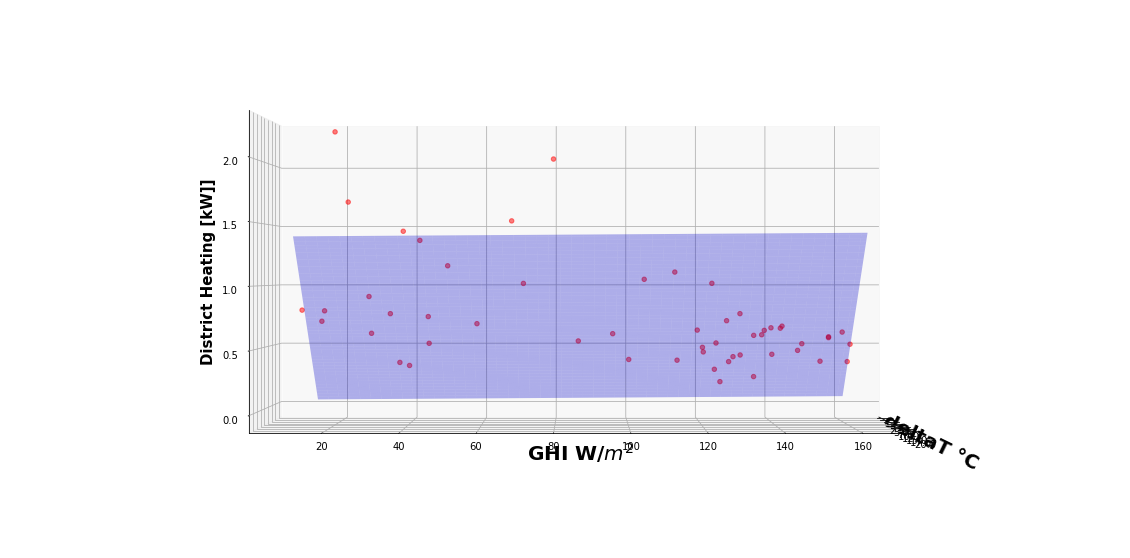

In [47]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_heat['deltaT'],df_heat['GHI'],df_heat['District_Heating [kW]'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf_heat,y_surf_heat,fittedY.reshape(x_surf_heat.shape), color='b', alpha=0.3)
ax.set_xlabel('deltaT °C', fontsize=20, fontweight='bold')
ax.set_ylabel('GHI W/$m^2$', fontsize=20, fontweight='bold')
ax.set_zlabel('District Heating [kW]]', fontsize=15, fontweight='bold')
ax.view_init(elev=0, azim=0)

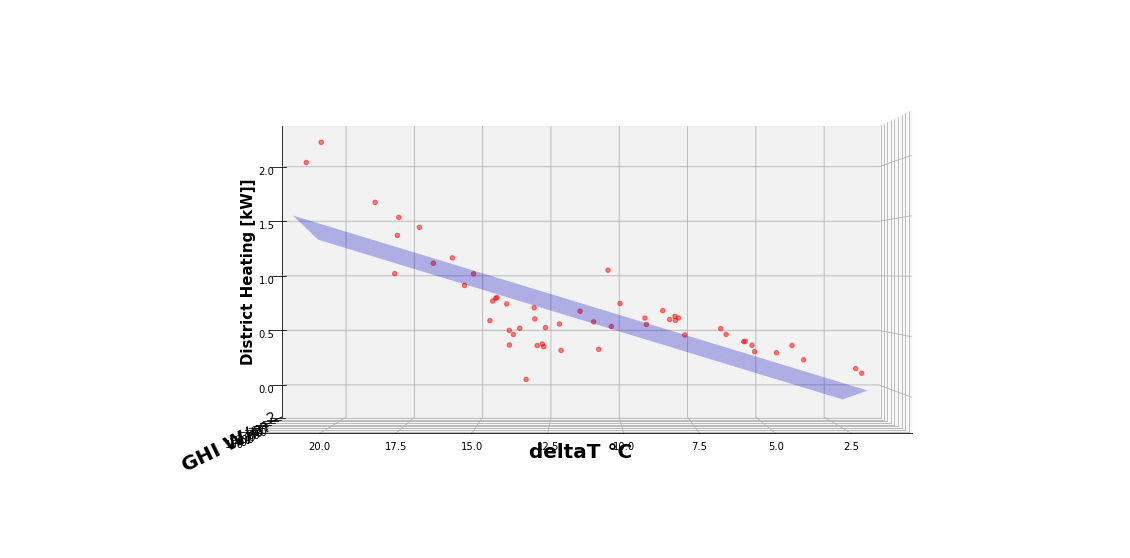

In [45]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_heat['deltaT'],df_heat['GHI'],df_heat['District_Heating [kW]'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf_heat,y_surf_heat,fittedY.reshape(x_surf_heat.shape), color='b', alpha=0.3)
ax.set_xlabel('deltaT °C', fontsize=20, fontweight='bold')
ax.set_ylabel('GHI W/$m^2$', fontsize=20, fontweight='bold')
ax.set_zlabel('District Heating [kW]]', fontsize=15, fontweight='bold')
ax.view_init(elev=0, azim=90)

In [48]:
'''
s = mlab.mesh(df_heat['deltaT'], df_heat['GHI'], df_heat['District_Heating [kW]'])
alpha = 30 # degrees 
mlab.view(azimuth=0, elevation=90, roll=-90+alpha)
mlab.show()
'''

"\ns = mlab.mesh(df_heat['deltaT'], df_heat['GHI'], df_heat['District_Heating [kW]'])\nalpha = 30 # degrees \nmlab.view(azimuth=0, elevation=90, roll=-90+alpha)\nmlab.show()\n"

##### Cooling

In [48]:
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [49]:
X_cool = []
Y_cool = []
for i in range(df_cool.shape[0]):
    x1 = df_cool["deltaT"][i]
    x2 = df_cool["GHI"][i]
    X_cool.append([x1, x2])
    Y_cool.append(df_cool["District_Cooling [kW]"][i])

In [50]:
Regressor_cool = LinearRegression()
Regressor_cool.fit(X_cool, Y_cool)

LinearRegression()

In [51]:
x_surf_cool, y_surf_cool = np.meshgrid(np.linspace(df_cool.deltaT.min(), df_cool.deltaT.max(), 100),np.linspace(df_cool.GHI.min(), df_cool.GHI.max(), 100))
onlyX = pd.DataFrame({'deltaT': x_surf_cool.ravel(), 'GHI': y_surf_cool.ravel()})
fittedY = Regressor_cool.predict(onlyX)

/home/ict4bd/ict4bd/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [52]:
fittedY=np.array(fittedY)
fittedY

array([0.5910397 , 0.58737734, 0.58371498, ..., 0.14572752, 0.14206516,
       0.13840279])

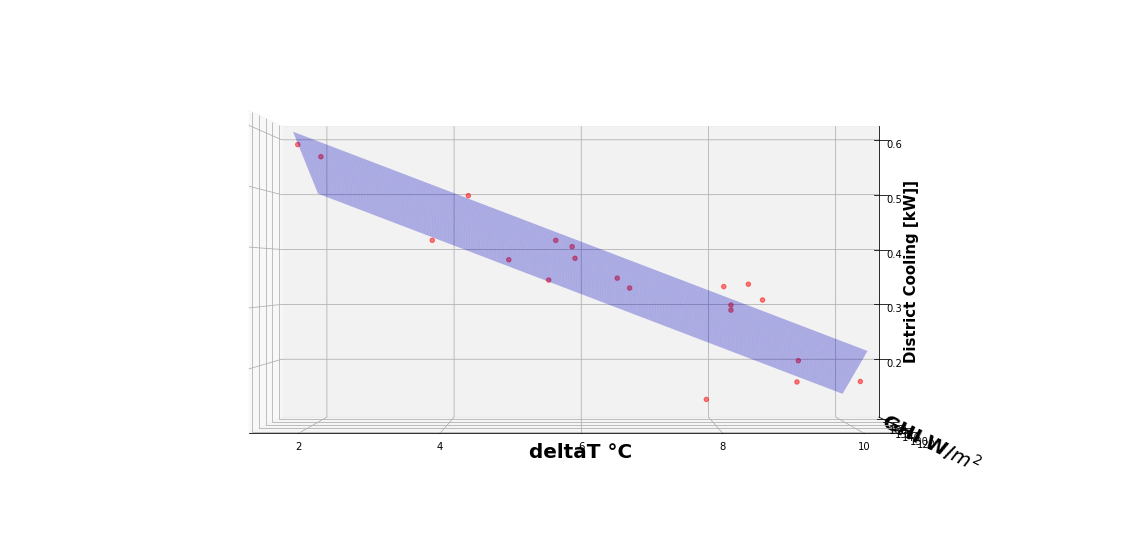

In [55]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cool['deltaT'],df_cool['GHI'],df_cool['District_Cooling [kW]'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf_cool,y_surf_cool,fittedY.reshape(x_surf_cool.shape), color='b', alpha=0.3)
ax.set_xlabel('deltaT °C', fontsize=20, fontweight='bold')
ax.set_ylabel('GHI W/$m^2$', fontsize=20, fontweight='bold')
ax.set_zlabel('District Cooling [kW]]', fontsize=15, fontweight='bold')
ax.view_init(elev=0, azim=270)

In [89]:
#df.index=pd.to_datetime(df.index)

In [90]:
#plt.plot(df.Power)

In [91]:
#plt.plot(df.P)

In [92]:
#plt.plot(df.P.values)

In [93]:
#df=pd.read_csv('building_67.csv')

In [94]:
#df=df.set_index(df.columns[0])

In [95]:
#plt.plot(df.P)

In [56]:
df["GHI"]

2017-01-01 00:00:00+00:00     11.991756
2017-01-08 00:00:00+00:00     30.325572
2017-01-15 00:00:00+00:00     30.326381
2017-01-22 00:00:00+00:00     68.738059
2017-01-29 00:00:00+00:00     22.881965
2017-02-05 00:00:00+00:00     51.465634
2017-02-12 00:00:00+00:00     44.444172
2017-02-19 00:00:00+00:00     79.938778
2017-02-26 00:00:00+00:00     71.654185
2017-03-05 00:00:00+00:00     95.644667
2017-03-12 00:00:00+00:00    121.798947
2017-03-19 00:00:00+00:00    112.131884
2017-03-26 00:00:00+00:00    123.574789
2017-04-02 00:00:00+00:00    128.390517
2017-04-09 00:00:00+00:00    119.936046
2017-04-16 00:00:00+00:00    113.203031
2017-04-23 00:00:00+00:00    159.625309
2017-04-30 00:00:00+00:00    155.101774
2017-05-07 00:00:00+00:00    158.627909
2017-05-14 00:00:00+00:00    134.147802
2017-05-21 00:00:00+00:00    161.846782
2017-05-28 00:00:00+00:00    142.878881
2017-06-04 00:00:00+00:00    142.138254
2017-06-11 00:00:00+00:00    137.010935
2017-06-18 00:00:00+00:00    154.469908
